## Mixture of random variables

Modeled using a "hidden" random variable $Z$ taking values in $\{1, ..., r\}$, with
$$ Y = \sum_{i = 1}^r 1_{Z = i} X_i . $$
Denoting $P(Z = i) = \omega_i$, we find the probability distribution
$$ p_Y(x) = \sum_{i = 1}^r P(Z = i) p_{Y \mid Z = i}(x) = \sum_{i = 1}^r \omega_i p_{X_i}(x) . $$
Thanks to the identity $p(x) s(x) = \nabla p(x)$, we find the score function
$$ s_Y(x) = \frac{1}{p_Y(x)} \sum_{i = 1}^r \omega_i p_{X_i}(x) s_{X_i}(x) = \sum_{i = 1}^r P(Z = i \mid Y = x) s_{X_i}(x) . $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gaussian import MultivariateNormal, Mixture

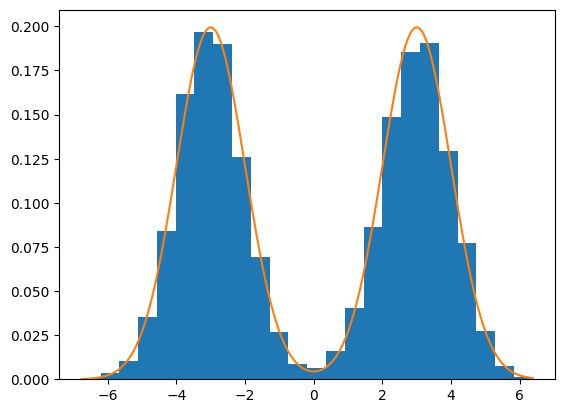

In [2]:
mix = Mixture((MultivariateNormal(1, -3.0), MultivariateNormal(1, 3.0)))

x_sample = mix.sample(10_000)
plt.hist(x_sample, bins="auto", density=True)
x = np.linspace(x_sample.min(), x_sample.max(), 200)[:, None]
plt.plot(x, mix.density(x))

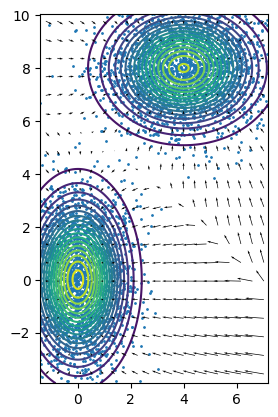

In [3]:
mean1 = np.array([4.0, 8.0])
mean2 = np.array([0.0, 0.0])

cov1 = np.array([2.3, 1.5])
cov2 = np.array([1.0, 3.0])

norm1 = MultivariateNormal(2, mean1, cov1)
norm2 = MultivariateNormal(2, mean2, cov2)
mix = Mixture((norm1, norm2))

x_sample, y_sample = mix.sample(5000).T

x_cont = np.linspace(x_sample.min() + 2.0, x_sample.max() - 2.0, 200)
y_cont = np.linspace(y_sample.min() + 2.0, y_sample.max() - 2.0, 200)
# x_cont = np.linspace(0.0, 5.0, 200)
# y_cont = np.linspace(0.0, 5.0, 200)
X, Y = np.meshgrid(x_cont, y_cont)
Z = mix.density(np.stack((X, Y), -1))

x_coarse = x_cont[5::10]
y_coarse = y_cont[5::10]
X_coarse, Y_coarse = np.meshgrid(x_coarse, y_coarse)
XY_coarse = np.stack((X_coarse, Y_coarse), -1)

UV = mix.score(XY_coarse)

fig, ax = plt.subplots()

ax.contour(X, Y, Z, levels=20)

ax.scatter(x_sample, y_sample, s=1)
ax.set_xlim(x_cont.min(), x_cont.max())
ax.set_ylim(y_cont.min(), y_cont.max())

U, V = UV[:, :, 0], UV[:, :, 1]
ax.quiver(X_coarse, Y_coarse, U, V, zorder=2)
ax.set_aspect("equal")

In [4]:
num_sides = 6
th = 2.0 * np.pi / num_sides
rot_half_th = np.array([[np.cos(0.5 * th), -np.sin(0.5 * th)], [np.sin(0.5 * th), np.cos(0.5 * th)]])
rot_th = np.array([[np.cos(th), -np.sin(th)], [np.sin(th), np.cos(th)]])

std = np.diag([2.0, 0.5])
mean = np.array([0.0, 6.0])
norms = []
for _ in range(num_sides):
    norms.append(MultivariateNormal(2, mean, std @ std.T))
    std = rot_th @ std
    mean = rot_th @ mean

mix = Mixture(tuple(norms))

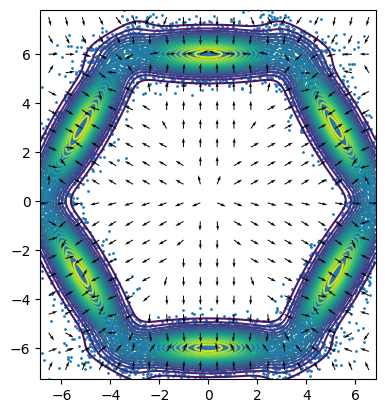

In [5]:
x_sample, y_sample = mix.sample(20_000).T

# x_fine = np.linspace(-10.0, 10.0, 200)
# y_fine = np.linspace(-10.0, 10.0, 200)
x_fine = np.linspace(x_sample.min() + 2.0, x_sample.max() - 2.0, 200)
y_fine = np.linspace(y_sample.min() + 2.0, y_sample.max() - 2.0, 200)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)
XY_fine = np.stack((X_fine, Y_fine), -1)

Z = mix.density(XY_fine)

x_coarse = x_fine[5::10]
y_coarse = y_fine[5::10]
X_coarse, Y_coarse = np.meshgrid(x_coarse, y_coarse)
XY_coarse = np.stack((X_coarse, Y_coarse), -1)

UV = mix.score(XY_coarse)

fig, ax = plt.subplots()

ax.contour(X_fine, Y_fine, mix.density(XY_fine), levels=20)
# for norm in norms:
#     ax.contour(X_fine, Y_fine, norm.density(XY_fine))

ax.scatter(x_sample, y_sample, s=1)
ax.set_xlim(x_fine.min(), x_fine.max())
ax.set_ylim(y_fine.min(), y_fine.max())

norm_UV = np.sqrt(np.sum(np.square(UV), -1, keepdims=True))
UV /= norm_UV
U, V = UV[:, :, 0], UV[:, :, 1]
ax.quiver(X_coarse, Y_coarse, U, V, zorder=2)
ax.set_aspect("equal")